## Démonstration du module PESR

In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import math
import random
import scipy.special 



class pesr:
    def __init__(self, data,n):
        self.data = data
        self.n = n

    
    def ech_poss(self):                        ## fonction qui retourne les echantillons possibles vu le mode de prélévement.
        k= scipy.special.binom(len(self.data),self.n).astype(int)
        c=1
        L = [i for i in range(len(self.data))]
        z = random.sample(L, self.n)
        R = [set(z)]
        while c<k:
            z = random.sample(L, self.n)
            if set(z) in R:
                pass
            else:
                R.append(set(z))
                c+=1
        return R
    
    def samples_as(self):
        import pandas as pd
        import numpy as np
        import scipy.special
        k = scipy.special.binom(len(self.data), self.n)
        k = k.astype(int)
        obj = [[] for i in range(k)]                      ### Création des DataFrames des différents échantillons possibles.
        dfs = [pd.DataFrame() for i in range(k)]
        for i,x in enumerate(self.ech_poss()):
            for y in x:
                obj[i].append(self.data[y])
                dfs[i] = pd.Series(np.array(obj[i])).to_frame()
                c = f"echantillon {i+1}"
                dfs[i].columns = [c]
        horizontal_concat = pd.concat([dfs[i] for i in range(k)], axis=1)
        print('Les échantillons possibles à prélever vu le mode de prélevement (probabilités égales sans remise) sont présentés\n dans le tableau ci-dessous: ')
        return horizontal_concat


class Sondage:                    ## Définition de la class Sondage
    def __init__(self,Column,N,x):
        self.Column = Column
        self.mean_ = x[self.Column].mean()      ## Moyenne de l'échantillon
        self.var_corr = None   ## variance corrigée de l'echantillon
        self.n = None          ## Taille de l'echantillion
        self.N = N             ## Taille de la population
        self.sd_ = None        ## ecart-type corrigé
        self.x = x             ## DataFrame
        self.dwa = None         ## Incertitude absolue
        self.dwr = None
        self.n_min = None
        self.ckn = None

## Définitions des propriétés applicables aux abjets de type Sondage        
        
    def taux_sondage(self):                                     ## Méthode qui calcule le taux de sondage (f = n/N)
        self.n = len(self.x[self.Column])
        print('le taux de sondage vaut :',  self.n/self.N)
        
    def var_cor(self):                                          ## Méthode qui calcule la variance corrigé de l'echantillon(estimateur san bias de la variance corrigée de la population)
        self.mean_ = self.x[self.Column].mean()
        self.var_corr = sum((self.x[self.Column]-self.mean_)**2)/(len(self.x[self.Column])-1)
        print("la variance corrigée de l'échantillon vaut: ", self.var_corr )
    
    def ecart_type_cor(self):                                  ## Méthode qui calcule l'ecart type-corrigé de l'echantillon.
        self.mean_ = self.x[self.Column].mean()
        self.var_corr = sum((self.x[self.Column]-self.mean_)**2)/(len(self.x[self.Column])-1)
        print("L'ecart-type corrigé de l'échantillon vaut: ", self.var_corr**(1/2))
        
    def IC(self,niveau):                                      ## Méthode qui calcule l'intervalle de confiance de la moyenne de la population à un niveau donné.
        z = stat.norm.ppf(niveau, loc=0, scale=1)
        a = self.mean_ - (z*np.sqrt((1-(self.n/self.N))*(sum((self.x[self.Column]-self.mean_)**2)/(len(self.x[self.Column])-1)/(self.n))))
        b = self.mean_ + (z*np.sqrt(((1-(self.n/self.N))*(sum((self.x[self.Column]-self.mean_)**2)/(len(self.x[self.Column])-1)/(self.n)))))
        self.IC_ = [a,b]
        print(self.IC_) 
        
    def incertitude_absolue(self, niveau):                    ## méthode qui calcule l'incertitude absolue.
        z = stat.norm.ppf(niveau, loc=0, scale=1)
        dwa = z*np.sqrt((1-(self.n/self.N))*(sum((self.x[self.Column]-self.mean_)**2)/(len(self.x[self.Column])-1)/(self.n)))
        print("L'incertitude absolue vaut : ", dwa)
        
        
    def incertitude_relative(self,niveau):                  ## Méthode qui calcule l'incertitude relative.
        z = stat.norm.ppf(niveau, loc=0, scale=1)
        dw = z*np.sqrt((1-(self.n/self.N))*(sum((self.x[self.Column]-self.mean_)**2)/(len(self.x[self.Column])-1)/(self.n)))
        dwr = dw/self.mean_
        print("L'incertitude relative vaut : ", dwr)
        
    def minimum_n(self, niveau,d0):                         ## Le plus petit entier tel que l'incertitude absolue est inférieure à un certain nombre determiné par le statisticien.
        z = stat.norm.ppf(niveau, loc=0, scale=1)
        s_carr= sum((self.x[self.Column]-self.mean_)**2)/(len(self.x[self.Column])-1)
        n_min = ((self.N)*(z**2)*(s_carr**2))/((self.N)*(d0**2)+ (z**2)*(s_carr**2))
        print("Le plus petit entier tel que l'incertitude absolue est inférieure à ", d0, " est égal à :", n_min )
        
    def comb_possible(self):                               ## Méthode qui calcule le nombre d'échantillons possibles.
        ckn = math.factorial(self.N)/(math.factorial(self.n)*math.factorial(self.N-len(self.x[self.Column])))
        print("Le nombre d'échantillons possibles vu le mode de prélévement (PESR) est :", ckn)
        

## On veut prélever des échantillons de la population ci_dessous.

In [30]:
population_data = [5,6,4,7,3,4,5,3,6,7,8,5,4,3,5,9,6,6,4] ## liste des données du caractère quantitatif 'y' dans la population.

In [31]:
objet = pesr(population_data, n=4 ) ## initialisation de l'objet (n représente la taille de l'echantillon)

In [32]:
df = objet.samples_as() ## L'élaboration de la DataFrame contenant tout les échantillons possibles à prélever vu le mode de prélevement (probabilité égales sans remise)

Les échantillons possibles à prélever vu le mode de prélevement (probabilités égales sans remise) sont présentés
 dans le tableau ci-dessous: 


In [33]:
df

,echantillon 1,echantillon 2,echantillon 3,echantillon 4,echantillon 5,echantillon 6,echantillon 7,echantillon 8,echantillon 9,echantillon 10,...,echantillon 3867,echantillon 3868,echantillon 3869,echantillon 3870,echantillon 3871,echantillon 3872,echantillon 3873,echantillon 3874,echantillon 3875,echantillon 3876
0,6,7,6,5,4,4,6,5,5,5,...,4,4,6,6,6,6,7,6,6,6
1,6,4,3,7,3,4,4,4,7,7,...,3,7,3,5,6,4,8,6,5,4
2,4,4,5,5,5,4,8,3,4,3,...,5,3,3,3,4,5,5,4,3,3
3,3,3,3,3,9,3,7,5,4,5,...,9,4,9,9,6,3,3,5,9,9


3876 échantillons possibles 

## Maintenant qu'on a eu nos échantillons, on veut estimer les paramétres de la population à savoir (la moyenne du caractère, la variance et l'cart type corrigée, les intervalles de confiances, l'incertitude absolue et relative).

### Initialisons un autre objet qui prend comme arguments,l'echantillon qui nous interesse, la taille de la population, et la DataFrame obtenu ci-dessus.

In [34]:
objet1 = Sondage('echantillon 1', len(population_data), df)

## La formule du taux de sondage:
\begin{equation}
f = n/N 
\end{equation}

In [35]:
objet1.taux_sondage()  ## pour calculer le taux de sondage pour les echantillons en question il suffit
                       #d'appliquer la méthode taux_sondage() sur l'objet initialisé.

le taux de sondage vaut : 0.21052631578947367


## La variance corrigé etant : $$ 1/(N-1)\sum\limits_{j=1}^{N}(y_{j}-y_{mo})^2$$

In [36]:
objet1.var_cor()          ## L'estimation de la variance corrigée associé au premier echantillon.

la variance corrigée de l'échantillon vaut:  2.25


## Ecart-type corrigé

In [37]:
objet1.ecart_type_cor()   ## L'estimation de l'ecart-type corrigé 

L'ecart-type corrigé de l'échantillon vaut:  1.5


## L'intervalle de confiance de la moyenne au niveau 1- alpha

$$ var(y_{w_mo}) = (1-f)s^2/n $$ **<i>s etant l'ecart-type de la population.<i>**

On estime le s de la population par celui de l'echantillon puisque le sw est un estimateur sans biasé de s (E(sw) = su)

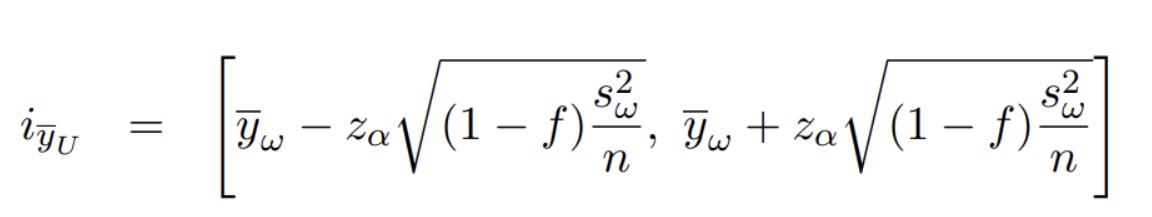

In [38]:
objet1.IC(niveau = 0.95)             ## commande qui donne l'intervalle de confiance de la moyenne au niveau désiré.

[3.653881899996988, 5.846118100003012]


## Incertitude absolue
f est le taux de sondage.

$z_{alpha}$ est le quantile d'ordre 1- alpha/2 de la loi normale.

$s_{w}$ est l'estimateur sans bias de l'ecart-type corrigé.

n est la taille de l'echantillon

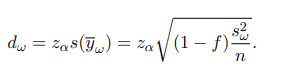

In [39]:
objet1.incertitude_absolue(niveau = 0.95)

L'incertitude absolue vaut :  1.096118100003012


## Incertitude relative 

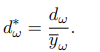

In [40]:
objet1.incertitude_relative(niveau = 0.95)

L'incertitude relative vaut :  0.230761705263792


## Soit ω un échantillon prélevé lors d’une étude préliminaire. La taille d’échantillon n à choisir
pour avoir :
◦ une incertitude absolue sur yU au niveau 100(1 − α)%, α ∈]0, 1[,
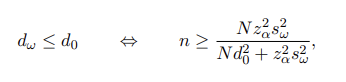

In [41]:
objet1.minimum_n(niveau = 0.95, d0=1)

Le plus petit entier tel que l'incertitude absolue est inférieure à  1  est égal à : 7.95916883795386
